<a href="https://colab.research.google.com/github/data602sps/assignments/blob/master/05_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 8**

# **Weeks 10 & 11- matplotlib & seaborn**
* In this homework assignment, you will explore and analyze a public dataset of your choosing. Since this assignment is “open-ended” in nature, you are free to expand upon the requirements below. However, you must meet the minimum requirments as indicated in each section.


* The preferred method for this analysis is in a .ipynb file. Feel free to use whichever platform of your choosing.  


### **Some data examples:**
•	https://www.data.gov/

•	https://opendata.cityofnewyork.us/

•	https://datasetsearch.research.google.com/

•	https://archive.ics.uci.edu/ml/index.php

### **Resources:**

•	https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

•	https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

•	https://www.data-to-viz.com/



### **Headings or comments**
**You are required to make use of comments, or headings for each section.  You must explain what your code is doing, and the results of running your code.**  Act as if you were giving this assignment to your manager - you must include clear and descriptive information for each section.

### **You may work as a group or indivdually on this assignment.**


# Introduction

In this section, please describe the dataset you are using.  Include a link to the source of this data.  You should also provide some explanation on why you choose this dataset.

Presidential approval polling is a personal interest since I like to follow politics daily and is a core topic in political science and data journalism. This dataset includes polling results over time, approval and disapproval percentages, pollster information, and sample sizes making it ideal for exploratory analysis and visualization practice with matplotlib and seaborn.

https://www.census.gov/data/tables/time-series/demo/voting-and-registration/p20-587.html

https://github.com/JDO-MSDS/DATA602/blob/main/Assignment%208/vote10_2024%20-%20vote10_2024.csv?plain=1

# Load and Parse Data

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.dpi"] = 120

# Load the raw CSV
raw_url = "https://raw.githubusercontent.com/JDO-MSDS/DATA602/refs/heads/main/Assignment%208/vote10_2024%20-%20vote10_2024.csv"
raw = pd.read_csv(raw_url, header=None)

# Row 4 in the raw file contains the reason headers (Illness/disability, Out of town, ...)
reasons = raw.iloc[4, 3:15].tolist()

def parse_section(raw_df, start_row, end_row, section_name):
    df = raw_df.iloc[start_row:end_row+1, :].copy()
    df.columns = ["group", "characteristic", "total_not_voting"] + reasons

    df["group"] = df["group"].ffill()

    df["label"] = df["characteristic"].fillna(df["group"])

    # Clean numeric columns
    df["total_not_voting"] = (
        df["total_not_voting"].astype(str)
        .str.replace(",", "", regex=False)
        .replace("nan", np.nan)
    )
    df["total_not_voting"] = pd.to_numeric(df["total_not_voting"], errors="coerce")

    for r in reasons:
        df[r] = pd.to_numeric(df[r], errors="coerce")

    df["section"] = section_name
    return df

# Rows: 5 through 46 and MOE data rows: 49 through 90
est = parse_section(raw, start_row=5, end_row=45, section_name="Estimate")
moe = parse_section(raw, start_row=49, end_row=90, section_name="MOE")

est.head()

,group,characteristic,total_not_voting,Illness or disability,Out of town,Forgot to vote,Not interested,"Too busy, conflicting schedule",Transportation problems,Did not like candidates or campaign issues,Registration problems,Bad weather conditions,Inconvenient polling place,Other reason,Don't know or refused,label,section
5,Total,NaN,18161,12.4,7.4,4.1,19.7,17.8,2.2,14.7,3.6,0.3,2.4,12.2,3.1,Total,Estimate
6,Age,18 to 24 years,2611,2.8,14.1,5.0,20.4,22.3,2.3,10.1,5.3,0.0,1.6,12.8,3.3,18 to 24 years,Estimate
7,Age,25 to 44 years,7476,6.4,6.3,4.7,21.1,23.6,1.6,14.0,3.5,0.2,3.2,12.2,3.2,25 to 44 years,Estimate
8,Age,45 to 64 years,4960,12.5,7.7,3.5,19.9,15.7,2.1,17.8,3.5,0.6,2.1,12.4,2.4,45 to 64 years,Estimate
9,Age,65 years and over,3115,35.0,4.2,3.1,15.7,3.5,3.8,15.4,2.6,0.3,1.5,11.4,3.6,65 years and over,Estimate


______________
# Data Exploration
Import your dataset into your .ipynb, create dataframes, and explore your data.  

Include:

* Summary statistics means, medians, quartiles,
* Missing value information
* Any other relevant information about the dataset.  



**Basic exploration + missing values**

In [3]:
print("Estimates shape:", est.shape)
print("MOE shape:", moe.shape)

print("\nMissing values (Estimates):")
display(est.isna().sum())

print("\nMissing values (MOE):")
display(moe.isna().sum())

Estimates shape: (41, 17)
MOE shape: (42, 17)

Missing values (Estimates):


,0
group,0
characteristic,1
total_not_voting,0
Illness or disability,0
Out of town,0
Forgot to vote,0
Not interested,0
"Too busy, conflicting schedule",0
Transportation problems,0
Did not like candidates or campaign issues,0



Missing values (MOE):


,0
group,0
characteristic,2
total_not_voting,1
Illness or disability,1
Out of town,1
Forgot to vote,1
Not interested,1
"Too busy, conflicting schedule",1
Transportation problems,1
Did not like candidates or campaign issues,1


**Summary statistics**

In [5]:
# Mean, std, min, 25%, 50%(median), 75%, max
num_est = est.select_dtypes(include="number")
display(num_est.describe().T)

# Medians for reason columns (estimates)
reason_medians = est[reasons].median().sort_values(ascending=False)
print("Median % by reason (across all rows in Estimates):")
display(reason_medians)


,count,mean,std,min,25%,50%,75%,max
total_not_voting,41.0,4891.439024,4791.594563,234.0,1442.0,3040.0,7476.0,18161.0
Illness or disability,41.0,12.700000,5.240706,2.8,9.4,12.5,14.5,35.0
Out of town,41.0,7.473171,2.580603,3.3,6.0,7.4,8.0,14.7
Forgot to vote,41.0,3.902439,0.939012,2.1,3.4,3.8,4.5,6.8
Not interested,41.0,19.678049,3.136599,8.3,18.4,19.7,21.1,26.6
"Too busy, conflicting schedule",41.0,18.007317,3.912888,3.5,17.0,18.2,20.0,23.7
Transportation problems,41.0,2.339024,1.390661,0.3,1.4,2.1,3.1,6.9
Did not like candidates or campaign issues,41.0,13.870732,2.989502,4.6,12.8,14.5,15.4,19.8
Registration problems,41.0,3.321951,1.414304,0.7,2.6,3.4,3.7,9.8
Bad weather conditions,41.0,0.207317,0.222924,0.0,0.0,0.2,0.3,1.1


Median % by reason (across all rows in Estimates):


,0
Not interested,19.7
"Too busy, conflicting schedule",18.2
Did not like candidates or campaign issues,14.5
Illness or disability,12.5
Other reason,12.3
Out of town,7.4
Forgot to vote,3.8
Registration problems,3.4
Don't know or refused,3.1
Inconvenient polling place,2.4


# Data Wrangling

Perform data wrangling.  You are free to use your best judgment here.  If you are stuck, look at previous assignment.

The original dataset is a wide “publication table” format. For visualization (especially seaborn), it’s more useful in a tidy/long format, where each row is a (group, label, reason, percent) combination.

I will:

- Convert estimates to long format
- Add a helper table for “top reasons” in the Total row
- Create filtered subsets for age/region comparisons

**Convert to tidy/long**

In [6]:
def to_long(df):
    return df.melt(
        id_vars=["section", "group", "label", "total_not_voting"],
        value_vars=reasons,
        var_name="reason",
        value_name="percent"
    )

est_long = to_long(est)
moe_long = to_long(moe)

est_long.head()

,section,group,label,total_not_voting,reason,percent
0,Estimate,Total,Total,18161,Illness or disability,12.4
1,Estimate,Age,18 to 24 years,2611,Illness or disability,2.8
2,Estimate,Age,25 to 44 years,7476,Illness or disability,6.4
3,Estimate,Age,45 to 64 years,4960,Illness or disability,12.5
4,Estimate,Age,65 years and over,3115,Illness or disability,35.0


**Top Reasons**

In [7]:
total_row = est[est["label"] == "Total"].iloc[0]
total_reasons = total_row[reasons].sort_values(ascending=False).reset_index()
total_reasons.columns = ["reason", "percent"]

total_reasons.head(10)

,reason,percent
0,Not interested,19.7
1,"Too busy, conflicting schedule",17.8
2,Did not like candidates or campaign issues,14.7
3,Illness or disability,12.4
4,Other reason,12.2
5,Out of town,7.4
6,Forgot to vote,4.1
7,Registration problems,3.6
8,Don't know or refused,3.1
9,Inconvenient polling place,2.4


# Visualizations

The main purpose of this assignment is to practice creating various visualizations using the matplotlib and seaborn library.

### **Part 1:**
Using matplotlib, create ***two or more plots*** that incorporate at least **5** of the following properties:

Note: these properties vary based on your data.  The goal is to practice creating visualizations and modifying its properties.

*   Use and change a legend position
*   Change a legend font size
*   Place a legend outside of the plot
*   Create a single legend for all subplots
*   Change the title and x/y labels
*   Change the marker, line colors, and line width
*   Add annotations
*   Modify Axis Text Ticks/Labels
*   Change size of axis Labels
*   Your own choice not included above


Plots that you can create **include**:

*   Scatter Plot
*   Bar plot
*   Line Chart
*   Multi Plots (e.g. using .subplot()
*   Histogram

You can add another plot not listed here if it works better for your data.  This is not a complete list of plots to create.

### **Part 2:**

Recreate the visualizations above using the Seaborn library as best as possible.  


**You are required to explain what each of your plots is representing. Plots without comments will not be accepted.**  In addition, please explain the properties you are showcasing.


### **Part 3:**
In a comment or text box, explain the differences between creating a plot in matplotlib and seaborn, based on your above plots.



### **Part 1**
#### **Matplotlib Plot 1 - Horizontal bar chart, annotated, styled ticks**

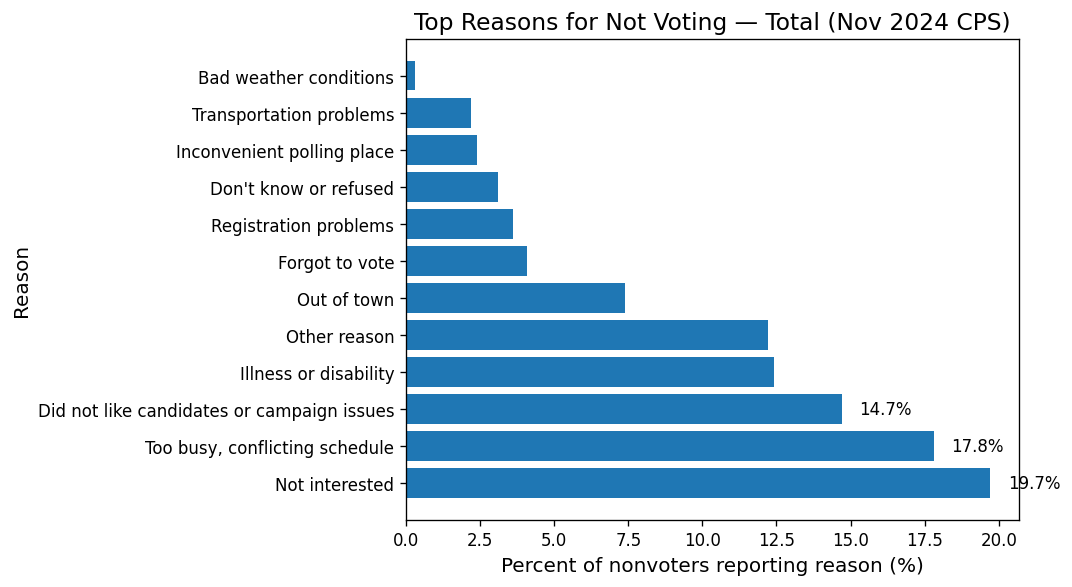

In [10]:
# oTp reasons for not voting
fig, ax = plt.subplots(figsize=(9, 5))

plot_df = total_reasons.sort_values("percent", ascending=False)

ax.barh(plot_df["reason"], plot_df["percent"])

ax.set_title("Top Reasons for Not Voting — Total (Nov 2024 CPS)", fontsize=14)
ax.set_xlabel("Percent of nonvoters reporting reason (%)", fontsize=12)
ax.set_ylabel("Reason", fontsize=12)

# Tick cust
ax.tick_params(axis="both", labelsize=10)

# Label top 3 bars
top3 = total_reasons.head(3)
for _, row in top3.iterrows():
    ax.annotate(
        f"{row['percent']:.1f}%",
        xy=(row["percent"], plot_df.index[plot_df["reason"] == row["reason"]][0]),
        xytext=(row["percent"] + 0.6, plot_df.index[plot_df["reason"] == row["reason"]][0]),
        va="center",
        fontsize=10
    )

plt.tight_layout()
plt.show()

Properties showcased in Plot 1: title/labels, tick label sizing, annotations (top 3), layout control.

#### **Matplotlib Plot 2 - Subplots + shared legend outside**

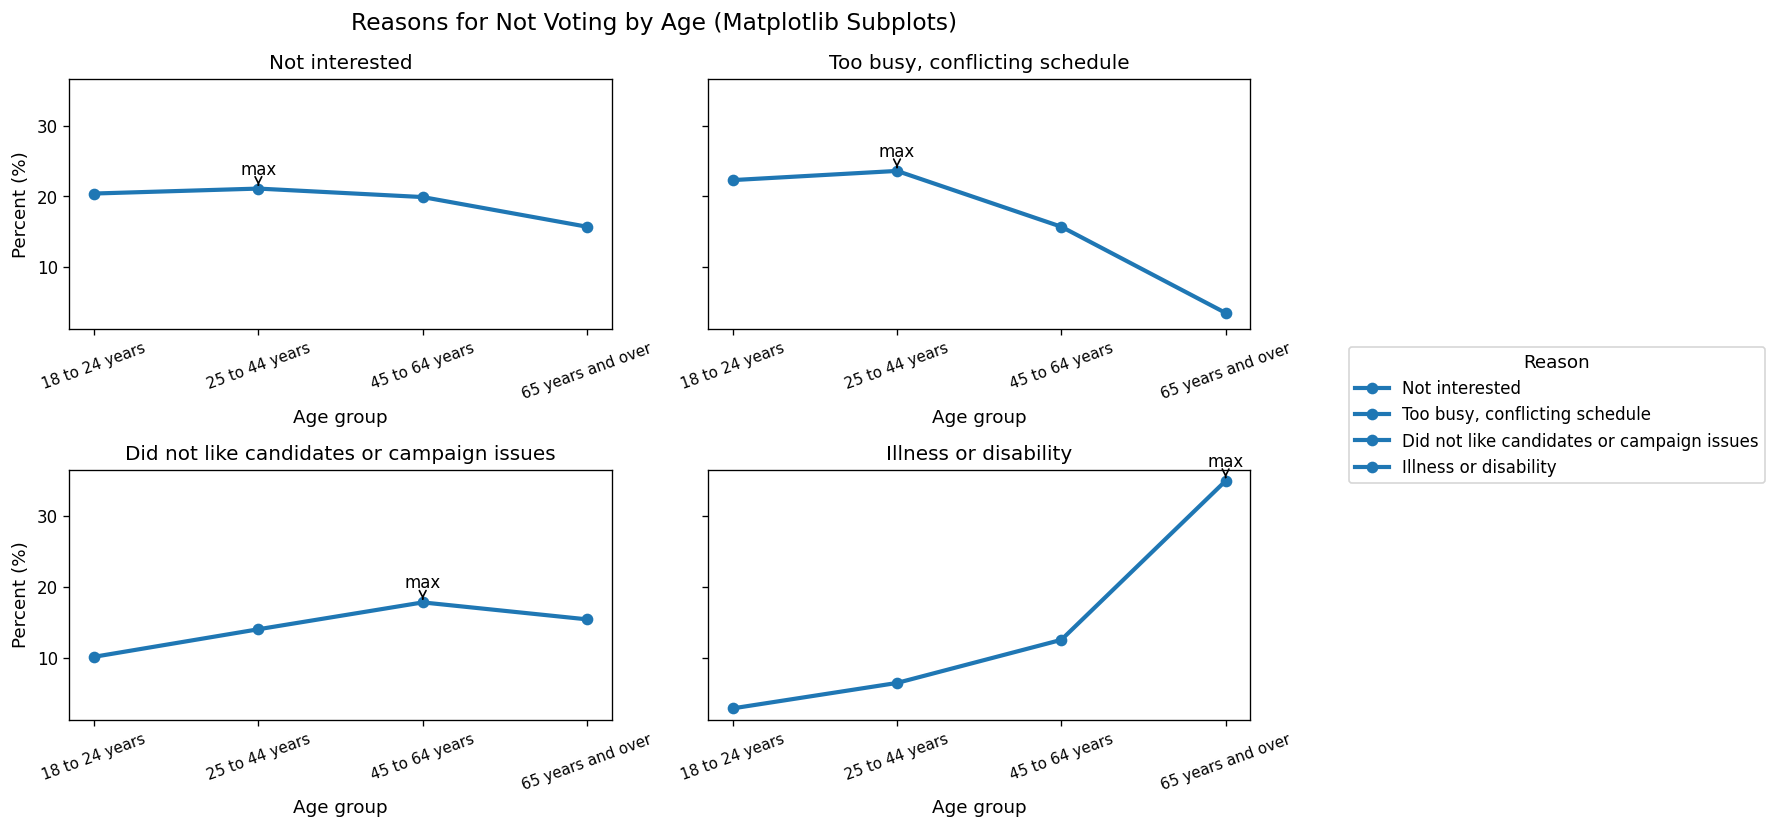

In [12]:
# Compare Age groups across selected reasons
selected_reasons = [
    "Not interested",
    "Too busy, conflicting schedule",
    "Did not like candidates or campaign issues",
    "Illness or disability"
]

age_df = est[est["group"] == "Age"][["label"] + selected_reasons].copy()

fig, axes = plt.subplots(2, 2, figsize=(11, 7), sharey=True)
axes = axes.ravel()

handles = []
labels = []

for i, reason in enumerate(selected_reasons):
    ax = axes[i]
    ax.plot(
        age_df["label"],
        age_df[reason],
        marker="o",
        linewidth=2.5,
        label=reason
    )
    ax.set_title(reason, fontsize=12)
    ax.set_xlabel("Age group", fontsize=11)
    ax.tick_params(axis="x", labelrotation=20, labelsize=9)
    ax.tick_params(axis="y", labelsize=10)

    max_idx = age_df[reason].idxmax()
    max_x = age_df.loc[max_idx, "label"]
    max_y = age_df.loc[max_idx, reason]
    ax.annotate(
        "max",
        xy=(list(age_df["label"]).index(max_x), max_y),
        xytext=(list(age_df["label"]).index(max_x), max_y + 2),
        ha="center",
        arrowprops=dict(arrowstyle="->", linewidth=1)
    )

axes[0].set_ylabel("Percent (%)", fontsize=11)
axes[2].set_ylabel("Percent (%)", fontsize=11)

fig.suptitle("Reasons for Not Voting by Age (Matplotlib Subplots)", fontsize=14)

# One legend for all subplots and place it outside
fig.legend(
    selected_reasons,
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    fontsize=10,
    title="Reason",
    title_fontsize=11
)

plt.tight_layout()
plt.show()

Properties showcased in Plot 2: subplots, shared legend, legend outside, legend font sizing, title/labels, marker/linewidth, annotations, tick rotation.

### **Part 2**
#### Visualizations — Part 2 (Seaborn)

Now I recreate the same ideas using Seaborn. Seaborn works best with tidy/long data, so I’ll use est_long.**bold text**

#### **Seaborn Plot 1 - Total reasons barplot**

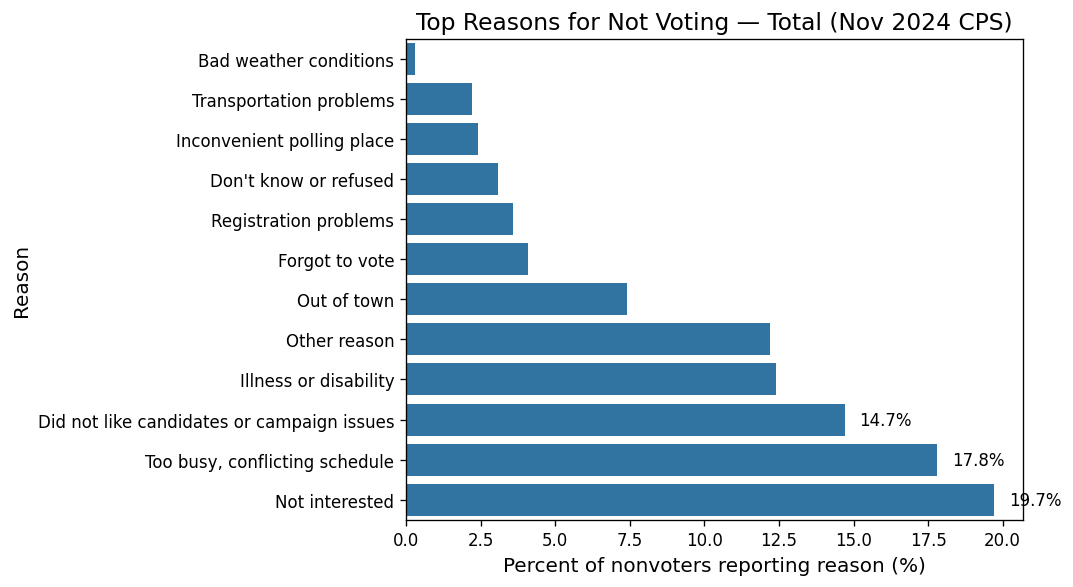

In [23]:
# Seaborn version of Plot 1 (Total)
plot_df = total_reasons.sort_values("percent", ascending=True).copy()

plt.figure(figsize=(9, 5))

ax = sns.barplot(
    data=plot_df,
    y="reason",
    x="percent",
    order=plot_df["reason"]
)

# Titles and labels
plt.title("Top Reasons for Not Voting — Total (Nov 2024 CPS)", fontsize=14)
plt.xlabel("Percent of nonvoters reporting reason (%)", fontsize=12)
plt.ylabel("Reason", fontsize=12)

# Labels
n = len(plot_df)

for i in range(n - 3, n):
    ax.text(
        plot_df.iloc[i]["percent"] + 0.5,
        i,
        f"{plot_df.iloc[i]['percent']:.1f}%",
        va="center",
        fontsize=10
    )

plt.tight_layout()
plt.show()

#### **Seaborn Plot 2 - Age x reason comparison with hue, legend outside**

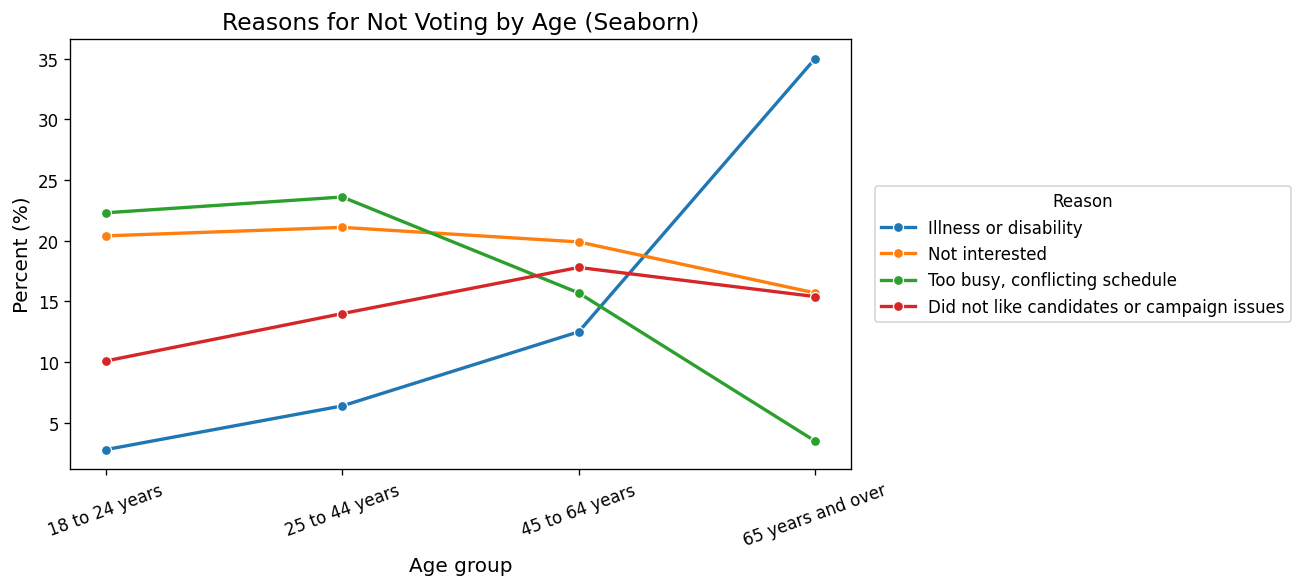

In [24]:
# Seaborn version of plot 2: Age by selected reasons
age_long = est_long[
    (est_long["group"] == "Age") &
    (est_long["reason"].isin(selected_reasons))
].copy()

plt.figure(figsize=(11, 5))

sns.lineplot(
    data=age_long,
    x="label",
    y="percent",
    hue="reason",
    marker="o",
    linewidth=2
)

plt.title("Reasons for Not Voting by Age (Seaborn)", fontsize=14)
plt.xlabel("Age group", fontsize=12)
plt.ylabel("Percent (%)", fontsize=12)
plt.xticks(rotation=20)

plt.legend(bbox_to_anchor=(1.02, 0.5), loc="center left", title="Reason")
plt.tight_layout()
plt.show()

### **Part 3 — Differences between Matplotlib and Seaborn**

Matplotlib is a lower-level visualization library that requires us to manually control most aspects of a plot, such as axes, subplots, legend placement, annotations, and styling. This level of control makes Matplotlib very powerful for creating highly customized figures, such as plots with a single shared legend across multiple subplots, but it often requires more code to achieve a polished result. On the contrary, Seaborn is a higher-level library that integrates naturally with tidy pandas DataFrames and simplifies the creation of common statistical and grouped visualizations through features like the hue parameter. Seaborn generally produces visually appealing plots with less code, although more precise customization—such as exact legend positioning or detailed annotation logic—still relies on access to the underlying Matplotlib objects.

# Conclusions  

After exploring your dataset, provide a short summary of what you noticed from this dataset.  

Overall, the largest reported reasons for not voting in November 2024 include not being interested, being too busy, and disliking candidates/issues, with important variation across groups. For example, age groups show noticeably different patterns: older adults have much higher “illness or disability” percentages, which was expected, while younger adults report “too busy” and “not interested” at higher rates. This dataset provides clear evidence that nonvoting is driven by a mix of motivation, logistics, and health-related barriers, and that these barriers change across demographic categories.